# Konwolucyjne siecie neuronowe

## Convolution neural networks, CNN

<br>

# Filtry jako ekstraktory informacji

<img src="Grafika/Filter.png" width="550">

<img src="Grafika/OriginalAndFilter.png" width="550">

<img src="Grafika/FirstPixelMulitiplication.png" width="550">

<img src="Grafika/SecondMultiplication.png" width="550">

Źródło: https://adeshpande3.github.io/adeshpande3.github.io/A-Beginner's-Guide-To-Understanding-Convolutional-Neural-Networks/

### Filtrowanie - konwolucja (splot):

<img src="Grafika/matrixConvolution.jpg" width="450">

Źródło: https://i.stack.imgur.com/SKgim.jpga

### Warstwa konwolucyjna

Warstawa konwolucyjna analizuje obraz "kawałek po kawałku" i zwraca informację o poszczególnych obszarach przy użyciu filtrów.

Warstwa konwolucyjna składa się z K filtrów i zwraca K "tablic" powstałych przez przetworzenie wejścia kolejnymi filtrami.

Operacja splotu (konwolucja):

<img src="Grafika/Convolution_schematic.gif" width="450">

Źródło: http://deeplearning.stanford.edu/wiki/images/6/6c/Convolution_schematic.gif

### W przypadku macierzy trójwymiarowych, filtorwanie (2D) wygląda tak:

<img src="https://i.stack.imgur.com/FjvuN.gif" width="550">

### Sieć konwolucyjna uczy się ekstrachować istotne "informacje" - parametrami sieci są wagi w filtrach.

Czyli sieć sama uczy się tego, co jest istotne w danych dla naszego celu.

W sieciach konwolucyjnych na wyjście splotu nakłada się funkcję aktywacji. Z reguły jest to ReLU:

<img src="Grafika/relu.png" width="350">

Źródło: https://ml4a.github.io/images/figures/relu.png

Takie przekształcenie można interpretować w następujący sposób: jeżeli w danym obszarze jest coś co dany filtr "rozpoznaje" (wartość splotu większa od 0), to zwracamy po prostu wynik splotu. Natomiast jeśli dane nie pasują do danego filtra (wartość ujemna), to niezaleznie od tego co w tych danych jest, zwracamy 0, które mówi, że nie ma tego czego szukamy.

## Pooling (subsampling)

Pooling to agregacja informacji - zamiast przechowywać całą tablicę, którą zwrócił filtr, wyciągamy sobie po jednej "informacji" z podobszarów. W ten sposób otrzymujemy tablicę o zredukowanym wymiarze.

MaxPooling:

<img src="Grafika/MaxPool.png" width="550">

Źródło: https://adeshpande3.github.io/assets/MaxPool.png

Jaką informację wyekstrahuje "max pooling"?

A jaką "average pooling"?

W praktyce z reguły po każdej warstwie konwolucyjnej daje się max pooling.

### Wielowarstwowa sieć konwolucyjna

Wielowarstwowe sieci konwolucyjne wykorzystują wielokrotne składanie operacji filtrowania i uczą się wykrywać bardzo złożone zależności.

Wówczas każda kolejna warstwa w jakiś sposób agreguje informacje z poprzedniej warstwy do ogólniejszego poziomu. Przykladowa interpretacja w kontekście klasyfikacji czy na danym zdjęciu jest człowiek:
- pierwsza warstwa: rozpoznawianie kształtów/konturów
- druga warstwa: detekcja części ciała
- trzecia: detekcja człowiek


<img src="Grafika/LeNet.png" width="700">
Źródło: https://adeshpande3.github.io/assets/LeNet.png"

### Wyjście sieci

Ostatnia warsta konwolucyjna (lub pooling) jest rozwijana do wektora. Ten wektor jest przepuszczany przez warstwy dense, które prowadzą do predykcji. Oczywiście można dokonywać predykcji bezpośrednio z rozwiniętego wektora.

### Uwaga. Filtr dla obrazka 2D jest tablicą 2D. Natomiast kolejne warstwy są 3D - dochodzi wymiar liczby filtrów. Dlatego dalsze filtry są kostami 3D, które mają głębokość równą liczbie filtrów w poprzedniej warstwie.

<img src="Grafika/conv3D.jpg" width="700">

Źródło: https://www.mathworks.com/content/mathworks/www/en/discovery/convolutional-neural-network/_jcr_content/mainParsys/image_copy.img.jpg/1497876372993.jpg

Naturalnie, jeżeli na wejściu mamy obiekt więcej niż dwu-wymiarowy to już pierwsza warstwa używa filtrów, które są kostkami.

## Strides - wielkość kroku przesunięcia

Określa dokładność z jaką chcemy skanować dane.

Strides = (1,1)

<img src="Grafika/Stride1.png" width="600">

Strides = (2,2)

<img src="Grafika/Stride2.png" width="600">

Źródło: https://adeshpande3.github.io/adeshpande3.github.io/A-Beginner's-Guide-To-Understanding-Convolutional-Neural-Networks-Part-2/


### Jeszcze jednym istotnym parametrem jest rozmiar filtra.

# Przechodzimy do praktyki!

# Obrazki 2D (szare)

http://scikit-learn.org/0.15/auto_examples/applications/face_recognition.html

In [96]:
import numpy as np
import pandas as pd
import os
from keras.utils import np_utils

from sklearn.datasets import fetch_lfw_people

lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

n_samples, h, w = lfw_people.images.shape

X = lfw_people.data
n_features = X.shape[1]

y = lfw_people.target

target_names = lfw_people.target_names

In [22]:
?fetch_lfw_people

In [7]:
X[0] # wektor - pozniej zamienimy na macierz, bo to jest obraz

array([254.      , 254.      , 251.66667 , ...,  87.333336,  88.666664,
        86.666664], dtype=float32)

In [8]:
X.shape

(1288, 1850)

In [9]:
np.unique(y,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6]), array([ 77, 236, 121, 530, 109,  71, 144]))

In [10]:
target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Tony Blair'], dtype='<U17')

In [97]:
# przygotowanie y
y = np_utils.to_categorical(y)
y[:5]

array([[0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [12]:
n_classes = y.shape[1]

In [14]:
from sklearn.model_selection import train_test_split

In [98]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4)

X_train = np.array([x.reshape((h, w, 1)) for x in X_train])
X_test = np.array([x.reshape((h, w, 1)) for x in X_test])

In [17]:
X_train.shape

(772, 50, 37, 1)

In [99]:
# skalowanie X

X_train = X_train/255
X_test = X_test/255

In [20]:
import matplotlib.pyplot as plt

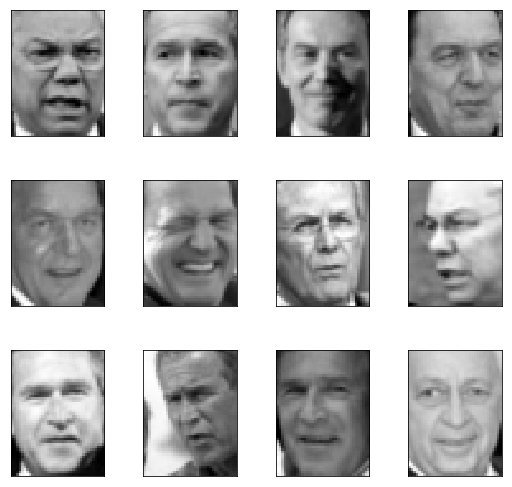

In [21]:
images = X_train[:12]
n_col = 4
n_row = 3
plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
for i in range(n_row * n_col):
    plt.subplot(n_row, n_col, i + 1)
    plt.imshow(images[i][:,:,0], cmap=plt.cm.gray)
    plt.xticks(())
    plt.yticks(())
    
plt.show()

In [23]:
X_train.shape

(772, 50, 37, 1)

In [24]:
y_train.shape

(772, 7)

In [28]:
X_test.shape

(516, 50, 37, 1)

### Ćwiczenie 1. Punkt odniesienia

Sprawdź klasyfikację przy użyciu perceptrona - sieć 0-warstwowa (lub 1-warstwowa licząc wyjście jako warstwę). Pamiętaj, że, aby uruchomić warstwę dense na danych, które nie są wektorem trzeba je "rozwinąć" przy uzyciu "warstwy" (operacji) Flatten. 

In [26]:
from keras import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [29]:
model = Sequential()
model.add(Flatten(input_shape=X_train.shape[1:]))
model.add(Dense(n_classes,activation="softmax"))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 1850)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 12957     
Total params: 12,957
Trainable params: 12,957
Non-trainable params: 0
_________________________________________________________________


In [30]:
early_stopping = EarlyStopping(patience=3,monitor="val_loss")

model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

model.fit(X_train, y_train, validation_split=0.25,epochs=100,callbacks=[early_stopping])

Train on 579 samples, validate on 193 samples
Epoch 1/100
579/579 [==============================] - 0s 752us/step - loss: 1.7697 - acc: 0.4007 - val_loss: 1.6400 - val_acc: 0.4352
Epoch 2/100
579/579 [==============================] - 0s 108us/step - loss: 1.6012 - acc: 0.4421 - val_loss: 1.5607 - val_acc: 0.4197
Epoch 3/100
579/579 [==============================] - 0s 153us/step - loss: 1.5311 - acc: 0.4646 - val_loss: 1.5462 - val_acc: 0.4352
Epoch 4/100
579/579 [==============================] - 0s 129us/step - loss: 1.4719 - acc: 0.4905 - val_loss: 1.4198 - val_acc: 0.4974
Epoch 5/100
579/579 [==============================] - 0s 85us/step - loss: 1.4057 - acc: 0.4974 - val_loss: 1.4312 - val_acc: 0.4715
Epoch 6/100
579/579 

In [31]:
model.evaluate(X_test,y_test)

516/516 [==============================] - 0s 50us/step


[1.312343571537225, 0.4728682170542636]

In [33]:
y_test.mean(0)

array([0.05620155, 0.1744186 , 0.1007752 , 0.39728683, 0.09496124,
       0.05426357, 0.12209302], dtype=float32)

In [34]:
model = Sequential()
model.add(Flatten(input_shape=X_train.shape[1:]))
model.add(Dense(100,activation="relu"))
model.add(Dense(n_classes,activation="softmax"))
model.summary()
early_stopping = EarlyStopping(patience=3,monitor="val_loss")

model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

model.fit(X_train, y_train, validation_split=0.25,epochs=100,callbacks=[early_stopping])

model.evaluate(X_test,y_test)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 1850)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               185100    
_________________________________________________________________
dense_3 (Dense)              (None, 7)                 707       
Total params: 185,807
Trainable params: 185,807
Non-trainable params: 0
_________________________________________________________________
Train on 579 samples, validate on 193 samples
Epoch 1/100
579/579 [==============================] - 1s 940us/step - loss: 1.8391 - acc: 0.3765 - val_loss: 1.6808 - val_acc: 0.4249

[1.0555022483648255, 0.6027131782945736]

In [35]:
from keras.layers.convolutional import Conv2D, MaxPooling2D, AveragePooling2D

In [38]:
X_train.shape

(772, 50, 37, 1)

In [41]:
model = Sequential()
model.add(Conv2D(16,(3,3),input_shape=X_train.shape[1:]))
model.add(Flatten())
model.add(Dense(n_classes,activation="softmax"))
model.summary()

early_stopping = EarlyStopping(patience=3,monitor="val_loss")
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
model.fit(X_train, y_train, validation_split=0.25,epochs=100,callbacks=[early_stopping])
model.evaluate(X_test,y_test)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 48, 35, 16)        160       
_________________________________________________________________
flatten_4 (Flatten)          (None, 26880)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 7)                 188167    
Total params: 188,327
Trainable params: 188,327
Non-trainable params: 0
_________________________________________________________________
Train on 579 samples, validate on 193 samples
Epoch 1/100
579/579 [==============================] - 1s 2ms/step - loss: 2.9075 - acc: 0.2919 - val_loss: 1.7565 - val_acc: 0.4404

[0.8179677461468896, 0.7228682170542635]

In [44]:
?MaxPooling2D

In [45]:
model = Sequential()
model.add(Conv2D(16,(3,3),input_shape=X_train.shape[1:]))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(n_classes,activation="softmax"))
model.summary()

early_stopping = EarlyStopping(patience=3,monitor="val_loss")
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
model.fit(X_train, y_train, validation_split=0.25,epochs=100,callbacks=[early_stopping])
model.evaluate(X_test,y_test)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 48, 35, 16)        160       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 24, 17, 16)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 6528)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 7)                 45703     
Total params: 45,863
Trainable params: 45,863
Non-trainable params: 0
_________________________________________________________________
Train on 579 samples, validate on 193 samples
Epoch 1/100
579/579 [==============================] - 2s 3ms/step - loss: 1.8197 - acc: 0.3938 - val_loss: 1.7241 - val_acc: 0.4145

[0.6769498330216075, 0.8003875968992248]

In [46]:
?Conv2D

In [47]:
model = Sequential()
model.add(Conv2D(16,(3,3),input_shape=X_train.shape[1:],padding="same"))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(n_classes,activation="softmax"))
model.summary()

early_stopping = EarlyStopping(patience=3,monitor="val_loss")
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
model.fit(X_train, y_train, validation_split=0.25,epochs=100,callbacks=[early_stopping])
model.evaluate(X_test,y_test)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 50, 37, 16)        160       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 25, 18, 16)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 7200)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 7)                 50407     
Total params: 50,567
Trainable params: 50,567
Non-trainable params: 0
_________________________________________________________________
Train on 579 samples, validate on 193 samples
Epoch 1/100
579/579 [==============================] - 2s 3ms/step - loss: 1.6846 - acc: 0.4059 - val_loss: 1.6428 - val_acc: 0.4145

[0.8190890716951947, 0.7441860465116279]

In [48]:
model = Sequential()
model.add(Conv2D(16,(3,3),input_shape=X_train.shape[1:],padding="same"))
model.add(AveragePooling2D((2,2)))
model.add(Flatten())
model.add(Dense(n_classes,activation="softmax"))
model.summary()

early_stopping = EarlyStopping(patience=3,monitor="val_loss")
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
model.fit(X_train, y_train, validation_split=0.25,epochs=100,callbacks=[early_stopping])
model.evaluate(X_test,y_test)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 50, 37, 16)        160       
_________________________________________________________________
average_pooling2d_1 (Average (None, 25, 18, 16)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 7200)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 7)                 50407     
Total params: 50,567
Trainable params: 50,567
Non-trainable params: 0
_________________________________________________________________
Train on 579 samples, validate on 193 samples
Epoch 1/100
579/579 [==============================] - 1s 2ms/step - loss: 1.7441 - acc: 0.4007 - val_loss: 1.6299 - val_acc: 0.4145

[0.8230743509854457, 0.7383720930232558]

In [49]:
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape=X_train.shape[1:],padding="same"))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(16,(2,2),input_shape=X_train.shape[1:],padding="same"))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(n_classes,activation="softmax"))
model.summary()

early_stopping = EarlyStopping(patience=3,monitor="val_loss")
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
model.fit(X_train, y_train, validation_split=0.25,epochs=100,callbacks=[early_stopping])
model.evaluate(X_test,y_test)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 50, 37, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 25, 18, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 25, 18, 16)        2064      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 9, 16)         0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 1728)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 7)                 12103     
Total params: 14,487
Trainable params: 14,487
Non-trainable params: 0
_________________________________________________________________
Train 

[0.6826506173887918, 0.7926356589147286]

<br>

# Case study 2

# Obrazki 3d (kolorowe - RGB)

(7000, 32, 32, 3)
(4000, 32, 32, 3)
(array([0, 1, 2, 3], dtype=uint8), array([1738, 1733, 1779, 1750]))
[[[170 180 198]
  [168 178 196]
  [177 185 203]
  ...
  [162 179 215]
  [158 178 214]
  [157 177 212]]

 [[168 181 198]
  [172 185 201]
  [171 183 200]
  ...
  [159 177 212]
  [156 176 211]
  [154 174 209]]

 [[154 170 186]
  [149 165 181]
  [129 144 162]
  ...
  [161 178 214]
  [157 177 212]
  [154 174 209]]

 ...

 [[ 74  84  80]
  [ 76  85  81]
  [ 78  85  82]
  ...
  [ 71  75  78]
  [ 68  72  75]
  [ 61  65  68]]

 [[ 68  76  77]
  [ 69  77  78]
  [ 72  79  78]
  ...
  [ 76  80  83]
  [ 71  75  78]
  [ 71  75  78]]

 [[ 67  75  78]
  [ 68  76  79]
  [ 69  75  76]
  ...
  [ 75  79  82]
  [ 71  75  78]
  [ 73  77  80]]]


/home/kodolamacz/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:23: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.


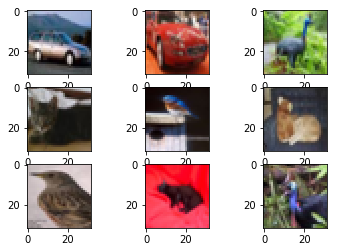

In [51]:
from keras.datasets import cifar10
from scipy.misc import toimage

import numpy as np

# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

nb_classes = 4
n_samples = 7000

X_train, y_train = X_train[np.where(y_train<nb_classes)[0]][:n_samples], y_train[np.where(y_train<nb_classes)[0]][:n_samples]
X_test, y_test = X_test[np.where(y_test<nb_classes)[0]], y_test[np.where(y_test<nb_classes)[0]]

print(X_train.shape)
print(X_test.shape)
print(np.unique(y_train,return_counts=True))
print(X_train[0])

# create a grid of 3x3 images
for i in range(0, 9):
	plt.subplot(330 + 1 + i)
	plt.imshow(toimage(X_train[i]))
# show the plot
plt.show()

In [52]:
# normalize inputs from 0-255 to 0.0-1.0

X_train = X_train/255
X_test = X_test/255

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

num_classes = y_test.shape[1]

X_train[0].shape

(32, 32, 3)

### Zadanie 1. Zbuduj jednowarstwową siec konwolucyjną z maxpoolingiem.

Liczba filtrów: 32; rozmiar filtra: 5x5.

### Zadanie 2. Zbuduj i przetestuj sieć przestawioną na rysunku:

<img src="https://adeshpande3.github.io/assets/LeNet.png" width="700">
Źródło: https://adeshpande3.github.io/assets/LeNet.png"


In [58]:
?Conv2D

In [59]:
model = Sequential()
model.add(Conv2D(6, (5,5), activation="relu", input_shape= X_train[0].shape))
model.add(MaxPooling2D(2))
model.add(Conv2D(16, (5,5), activation="relu"))
model.add(MaxPooling2D(2))
model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(4, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 28, 28, 6)         456       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 400)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 120)               48120     
_________________________________________________________________
dense_15 (Dense)             (None, 84)                10164     
__________

In [60]:
early_stopping = EarlyStopping(patience=3,monitor="val_loss")
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
model.fit(X_train, y_train, validation_split=0.25,epochs=100,callbacks=[early_stopping])
model.evaluate(X_test,y_test)

Train on 5250 samples, validate on 1750 samples
Epoch 1/100
5250/5250 [==============================] - 13s 3ms/step - loss: 1.1187 - acc: 0.5112 - val_loss: 1.0680 - val_acc: 0.5463

[0.8074132673740387, 0.7215]

In [55]:
model.predict_proba(X_test)

array([[1.2665660e-03, 7.8858614e-01, 4.8492204e-02, 1.6165513e-01],
       [8.8221031e-01, 1.1501479e-01, 1.2820087e-03, 1.4928941e-03],
       [1.8639038e-03, 9.9705243e-01, 2.1590559e-04, 8.6764101e-04],
       ...,
       [6.6848175e-04, 4.0091602e-03, 1.0349670e-02, 9.8497272e-01],
       [4.0589357e-04, 4.1620299e-04, 1.1281888e-02, 9.8789597e-01],
       [2.6488480e-01, 7.2055984e-01, 1.2248453e-03, 1.3330522e-02]],
      dtype=float32)

In [57]:
model.predict_classes(X_test)

array([1, 0, 1, ..., 3, 3, 1])

In [67]:
from keras.applications import VGG16, InceptionV3

In [65]:
base_model = VGG16(weights='imagenet',include_top=False)

58892288/58889256 [==============================] - 16s 0us/step

In [66]:
base_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0         
__________

In [69]:
inc = InceptionV3()

96116736/96112376 [==============================] - 17s 0us/step

In [70]:
inc.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv2d_15 (Conv2D)              (None, None, None, 3 864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, None, None, 3 96          conv2d_15[0][0]                  
__________________________________________________________________________________________________
activation_1 (Activation)       (None, None, None, 3 0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_16 

In [89]:
h,w = 150, 150
model = VGG16(weights='imagenet',include_top=False,input_shape=(h,w,3))

In [81]:
len(model.layers)

19

In [90]:
h,w = 150, 150
model = VGG16(weights='imagenet',include_top=False,input_shape=(h,w,3))

top_model = Sequential()
top_model.add(Flatten(input_shape=model.output_shape[1:]))
top_model.add(Dense(256, activation='relu'))
top_model.add(Dense(1, activation='sigmoid'))

model_transfer = Sequential()
model_transfer.add(model)
model_transfer.add(top_model)

model_transfer.layers[0].trainable = False

model_transfer.summary()

In [85]:
from keras.preprocessing.image import ImageDataGenerator

In [93]:
model_transfer.compile(loss='binary_crossentropy',optimizer="sgd",metrics=['accuracy'])

train_data_dir = '/home/kodolamacz/Pobrane/kagglecatsanddogs_3367a/PetImages/data/train/'
validation_data_dir = '/home/kodolamacz/Pobrane/kagglecatsanddogs_3367a/PetImages/data/validation/'
nb_train_samples = 1607
nb_validation_samples = 363
epochs = 50
batch_size = 16




# prepare data augmentation configuration
#train_datagen = ImageDataGenerator(rescale=1./255, 
#                                   shear_range=0.2, 
#                                   zoom_range=0.2,
#                                   rotation_range=30, 
#                                   horizontal_flip=True)

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_data_dir, 
                                                    target_size=(h, w), 
                                                    batch_size=batch_size, class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_data_dir,target_size=(h, w), 
                                                        batch_size=batch_size,class_mode='binary')

model_transfer.fit_generator(train_generator, samples_per_epoch=nb_train_samples, epochs=epochs, 
                    validation_data=validation_generator, nb_val_samples=nb_validation_samples)

Found 1607 images belonging to 2 classes.
Found 363 images belonging to 2 classes.


/home/kodolamacz/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:28: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/home/kodolamacz/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:28: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., epochs=50, validation_data=<keras_pre..., steps_per_epoch=100, validation_steps=363)`


Epoch 1/50
  8/100 [=>............................] - ETA: 32:35 - loss: 0.9825 - acc: 0.5625

KeyboardInterrupt: 

In [100]:
model = Sequential()
model.add(Flatten(input_shape=X_train.shape[1:]))
model.add(Dense(100,activation="relu"))
model.add(Dense(n_classes,activation="softmax"))
model.summary()
early_stopping = EarlyStopping(patience=3,monitor="val_loss")

model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

model.fit(X_train, y_train, validation_split=0.25,epochs=100,callbacks=[early_stopping])

model.evaluate(X_test,y_test)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_15 (Flatten)         (None, 1850)              0         
_________________________________________________________________
dense_25 (Dense)             (None, 100)               185100    
_________________________________________________________________
dense_26 (Dense)             (None, 7)                 707       
Total params: 185,807
Trainable params: 185,807
Non-trainable params: 0
_________________________________________________________________
Train on 579 samples, validate on 193 samples
Epoch 1/100
579/579 [==============================] - 5s 8ms/step - loss: 1.9001 - acc: 0.3143 - val_loss: 1.5866 - val_acc: 0.4870

[0.8154705513355344, 0.7344961240310077]

In [102]:
from keras.models import Model
from keras.layers import Input

In [109]:
input_data = Input(shape=X_train.shape[1:])
flatten = Flatten()(input_data)
dense = Dense(100,activation="relu")(flatten)
classify = Dense(n_classes,activation="softmax")(dense)

model = Model(inputs=input_data, outputs=classify)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         (None, 50, 37, 1)         0         
_________________________________________________________________
flatten_19 (Flatten)         (None, 1850)              0         
_________________________________________________________________
dense_33 (Dense)             (None, 100)               185100    
_________________________________________________________________
dense_34 (Dense)             (None, 7)                 707       
Total params: 185,807
Trainable params: 185,807
Non-trainable params: 0
_________________________________________________________________


In [110]:
early_stopping = EarlyStopping(patience=3,monitor="val_loss")
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
model.fit(X_train, y_train, validation_split=0.25,epochs=100,callbacks=[early_stopping])
model.evaluate(X_test,y_test)

Train on 579 samples, validate on 193 samples
Epoch 1/100
579/579 [==============================] - 2s 4ms/step - loss: 1.8713 - acc: 0.3420 - val_loss: 1.6639 - val_acc: 0.4922
Epoch 2/100
579/579 [==============================] - 0s 557us/step - loss: 1.6698 - acc: 0.4162 - val_loss: 1.6883 - val_acc: 0.4974

[1.1399642339972562, 0.6162790697674418]

In [111]:
from keras.layers import Concatenate

In [114]:
input_data = Input(shape=X_train.shape[1:])
flatten = Flatten()(input_data)

branch1_dense = Dense(10,activation="relu")(flatten)
branch1_dense = Dense(10,activation="relu")(branch1_dense)

branch2_dense = Dense(30,activation="relu")(flatten)
branch2_dense = Dense(30,activation="relu")(branch2_dense)

concat = Concatenate()([branch1_dense, branch2_dense])

classify = Dense(50,activation="relu")(concat)
classify = Dense(n_classes,activation="softmax")(classify)

model = Model(inputs=input_data, outputs=classify)
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           (None, 50, 37, 1)    0                                            
__________________________________________________________________________________________________
flatten_21 (Flatten)            (None, 1850)         0           input_11[0][0]                   
__________________________________________________________________________________________________
dense_39 (Dense)                (None, 10)           18510       flatten_21[0][0]                 
__________________________________________________________________________________________________
dense_41 (Dense)                (None, 30)           55530       flatten_21[0][0]                 
__________________________________________________________________________________________________
dense_40 (

In [115]:
early_stopping = EarlyStopping(patience=3,monitor="val_loss")
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
model.fit(X_train, y_train, validation_split=0.25,epochs=100,callbacks=[early_stopping])
model.evaluate(X_test,y_test)

Train on 579 samples, validate on 193 samples
Epoch 1/100
579/579 [==============================] - 3s 4ms/step - loss: 1.7405 - acc: 0.3869 - val_loss: 1.5944 - val_acc: 0.4870
Epoch 2/100
579/579 [==============================] - 0s 398us/step - loss: 1.6787 - acc: 0.3990 - val_loss: 1.6009 - val_acc: 0.4870
Epoch 3/100
579/579 [==============================] - 0s 478us/step - loss: 1.6676 - acc: 0.3990 - val_loss: 1.5584 - val_acc: 0.4870

[1.3021317101264185, 0.5135658914728682]

In [ ]:
# gdybysmy chcieli klasyfikowac posty zawieracja obrazek i tresc:

obrazek = Input(shape=...)
tekst = Input(...)
....
...
...
...
output = Dense(1)

model = Model(inputs=[obrazek,tekst],outputs=output)
....

model.fit([obrazki_train,teksty_train], y_train)

In [ ]:
base_model = VGG16(weight)

In [117]:
h,w = 150, 150
base_model = VGG16(weights='imagenet',include_top=False,input_shape=(h,w,3))

In [125]:
base_model.layers[6].output

<tf.Tensor 'block2_pool_5/MaxPool:0' shape=(?, 37, 37, 128) dtype=float32>

In [126]:
wejscie = base_model.input

cechy_vgg = base_model.layers[6].output

classify = Flatten()(cechy_vgg)
classify = Dense(50)(classify)
output = Dense(n_classes,activation="softmax")(classify)

model = Model(inputs=wejscie,outputs=output)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________